# Prerequisites

In [167]:
%pip install scikit-learn
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 1. Download Dataset

In [168]:
filename = "used_cars_autoscout24.csv"
URL = "http://www.juergenbrauer.org/datasets/" + filename

# import urllib.request
# urllib.request.urlretrieve(URL, filename)

# 2. Read Data

In [169]:
import pandas
table = pandas.read_csv(filename)
table.head(5)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


# 3. Clean Data

In [170]:
table["registration_date"] = pandas.to_datetime(table["registration_date"], errors="coerce")
table["year"] = pandas.to_numeric(table["year"], errors="coerce")
table["price_in_euro"] = pandas.to_numeric(table["price_in_euro"], errors="coerce")
table["power_kw"] = pandas.to_numeric(table["power_kw"], errors="coerce")
table["power_ps"] = pandas.to_numeric(table["power_ps"], errors="coerce")
table.info()

C:\Users\chfle\AppData\Local\Temp\ipykernel_21920\60134713.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  table["registration_date"] = pandas.to_datetime(table["registration_date"], errors="coerce")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                251079 non-null  int64         
 1   brand                     251079 non-null  object        
 2   model                     251079 non-null  object        
 3   color                     250913 non-null  object        
 4   registration_date         250882 non-null  datetime64[ns]
 5   year                      250884 non-null  float64       
 6   price_in_euro             250880 non-null  float64       
 7   power_kw                  250786 non-null  float64       
 8   power_ps                  250869 non-null  float64       
 9   transmission_type         251079 non-null  object        
 10  fuel_type                 251079 non-null  object        
 11  fuel_consumption_l_100km  224206 non-null  object        
 12  fu

In [171]:
clean_data = table[["brand", "mileage_in_km", "power_ps", "price_in_euro"]]
clean_data = clean_data.dropna()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250692 entries, 0 to 251078
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   brand          250692 non-null  object 
 1   mileage_in_km  250692 non-null  float64
 2   power_ps       250692 non-null  float64
 3   price_in_euro  250692 non-null  float64
dtypes: float64(3), object(1)
memory usage: 9.6+ MB


In [172]:
# One Hot Encoding
clean_data = pandas.get_dummies(clean_data)

# 4. Prepare Data for ML

##  4.1 Input/Output Split

In [173]:
x = clean_data.drop("price_in_euro", axis="columns")
y = clean_data[["price_in_euro"]]

In [174]:
x.shape

(250692, 49)

In [175]:
y.shape

(250692, 1)

## 4.2 Train/Test Split

In [176]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [177]:
x_train.shape

(200553, 49)

In [178]:
x_test.shape

(50139, 49)

In [179]:
y_train.shape

(200553, 1)

In [180]:
y_test.shape

(50139, 1)

## 4.3 Scaler

In [181]:
from sklearn.preprocessing import MinMaxScaler

input_scaler = MinMaxScaler()
input_scaler.fit(x_train)
x_train_scaled = input_scaler.transform(x_train)

output_scaler = MinMaxScaler()
output_scaler.fit(y_train)
y_train_scaled = output_scaler.transform(y_train)

x_test_scaled = input_scaler.transform(x_test)
y_test_scaled = output_scaler.transform(y_test)

# 5. Custom Neuronal Network

1 x1 x2 ... x49      
                        w0
                        w1
                        w2
                        ...
                        w49

act = dot(input, weights) = 1 * w0 + x1 * w1 + x2 * w2 + ... + x49 * w49

In [182]:
import numpy as np

N = x_train.shape[1] + 1 # +1 for the bias 

# Random weights
weight_vector = np.random.normal(loc=0.0, scale=1.0, size=N)
weight_vector

array([-0.17673905, -0.77769714, -1.2135059 ,  1.47488594, -0.84216083,
        0.06982795, -0.18418485,  0.09131527,  1.41521441,  0.93498763,
       -1.90333503, -0.45255509, -0.81454408,  0.58968904, -0.8424793 ,
       -1.37098537, -2.21497092,  0.16002381,  1.99751278, -2.26770497,
       -0.56318509,  1.3270465 , -0.69446714,  2.89565706, -0.48184768,
        0.35922091, -1.16342789,  0.74813365,  0.66432429,  0.35496194,
        0.13405586,  0.25156071,  1.23166186, -1.13841506, -0.83262423,
        1.69617699, -0.56043212,  0.80444619,  1.034529  , -0.52226782,
       -0.88139155, -0.55464728, -1.11346382,  0.50839185,  0.75258932,
        0.60675203,  0.68956048,  0.88334116, -1.18973053,  1.60615514])

In [183]:
# Input with bias
input_vector = np.ones(N)
input_vector[1:] = x_train_scaled[0]
input_vector

array([1.00000000e+00, 3.68421053e-06, 8.65191147e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [184]:
# Activity from input and weights
activity = np.dot(weight_vector, input_vector)
activity

np.float64(-1.1631249135050605)

In [185]:
# ReLU activation function to calculate output
def relu(x):
    return np.maximum(0, x)

out = relu(activity)
out

np.float64(0.0)

# 6. Score Model

In [186]:
x_test_scaled.shape

(50139, 49)

In [187]:
def score_model():
    test_count = x_test_scaled.shape[0]

    errors = []
    for test_index in range(test_count):
        # Feedforward
        input_vector[1:] = x_test_scaled[test_index]
        activity = np.dot(input_vector, weight_vector)

        output = relu(activity)
        output_unscaled = output_scaler.inverse_transform([[output]])

        # Lerning
        target = y_test_scaled[test_index][0]
        target_unscaled = output_scaler.inverse_transform([[target]])
        
        absolute_error = abs(target_unscaled - output_unscaled)
        errors.append(absolute_error)

    average_error = np.mean(errors)
    return average_error

In [188]:
score_model()

np.float64(1956144.7435763183)

# All in one

In [189]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

example_count = x_train_scaled.shape[0]
input_length = x_train_scaled.shape[1] + 1

weight_vector = np.random.normal(loc=0.0, scale=1.0, size=input_length)
input_vector = np.ones(N)

errors_unscaled = []
average_errors = []

In [190]:
epoch_count = 1
learning_rate = 0.01
for epoch in range(epoch_count):
    for example_index in range(example_count):
        # Feedforward
        input_vector[1:] = x_train_scaled[example_index]
        activity = np.dot(weight_vector, input_vector)
        output = relu(activity)

        # Learning
        target = y_train_scaled[example_index][0]
        error = target - output
        
        for i in range(input_length):
            # Perceptron learning rule
            weight_vector[i] += learning_rate * error * input_vector[i]

        # Score (90 % of time is spent here)
        output_unscaled = output_scaler.inverse_transform([[output]])
        target_unscaled = output_scaler.inverse_transform([[target]])
        absolute_error = abs(target_unscaled - output_unscaled)
        errors_unscaled.append(absolute_error)
        # Mean absolute error
        if (example_index + 1) % 1000 == 0:
           average_errors.append(np.mean(errors_unscaled))

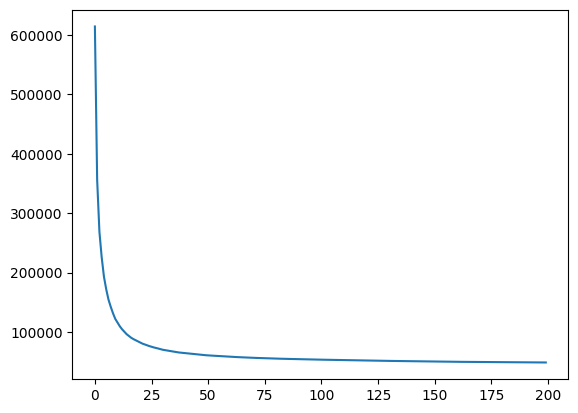

In [191]:
import matplotlib.pyplot as plt
plt.plot(average_errors)
plt.show()

In [192]:
score_model()

np.float64(44669.517685892606)